# SeismicSource
A simple module for basic seismic source modeling.
Before installing, first resolve all dependencies by installing [ObsPy](https://github.com/obspy/obspy).
# Installation
## General installation 
Start python and run:

In [1]:
import source

The whole module is then accessible by typing `source.` and TAB.
## Importing the SeismicSource class
Start python and run:

In [2]:
from source import SeismicSource

The `SeismicSources` class can then be used.
# Examples
Examples use `matplotlib`, `mpl_toolkits` and `numpy` libraries (pre-installed with ObsPy). Standard import commands are needed first.

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

## A double couple
A model for a pure double couple event on the Mxy component is defined with the following six independent tensors:

In [4]:
dc = np.array([0.,0.,0.,1.,0.,0.])

An instance of the `SeismicSource` class with such a moment tensor is defined by:

In [5]:
model_example = SeismicSource(dc)

The radiation pattern of this seismic source, as defined by Aki and Richards (2002) can be viewed with:

<IPython.core.display.Javascript object>


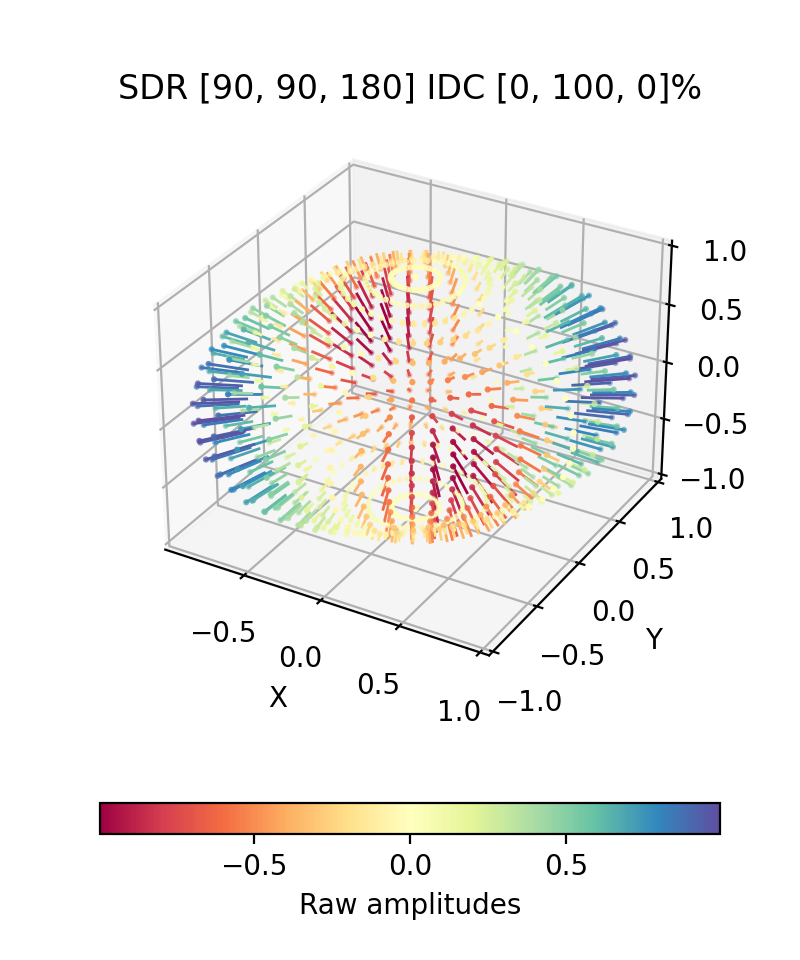

/Users/fmassin/Google Drive/Projects/NaiNo-Kami/Py/SeismicSource/source.py:359: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([[strike, dip, rake], [DC, CLVD, iso, devi]])


In [6]:
model_example.Aki_Richards.plot(wave='P',style='v')

This a comet plot, displacements magnitudes, directions and final state are given, respectively by the colors, lines and points (as if looking at comets). SDR stand for strike, dip, rake angles and IDC stand for isotropic, double couple, compensated linear vector dipole percentages.

To see the same source as defined by Vavryeuk (2001) :

<IPython.core.display.Javascript object>


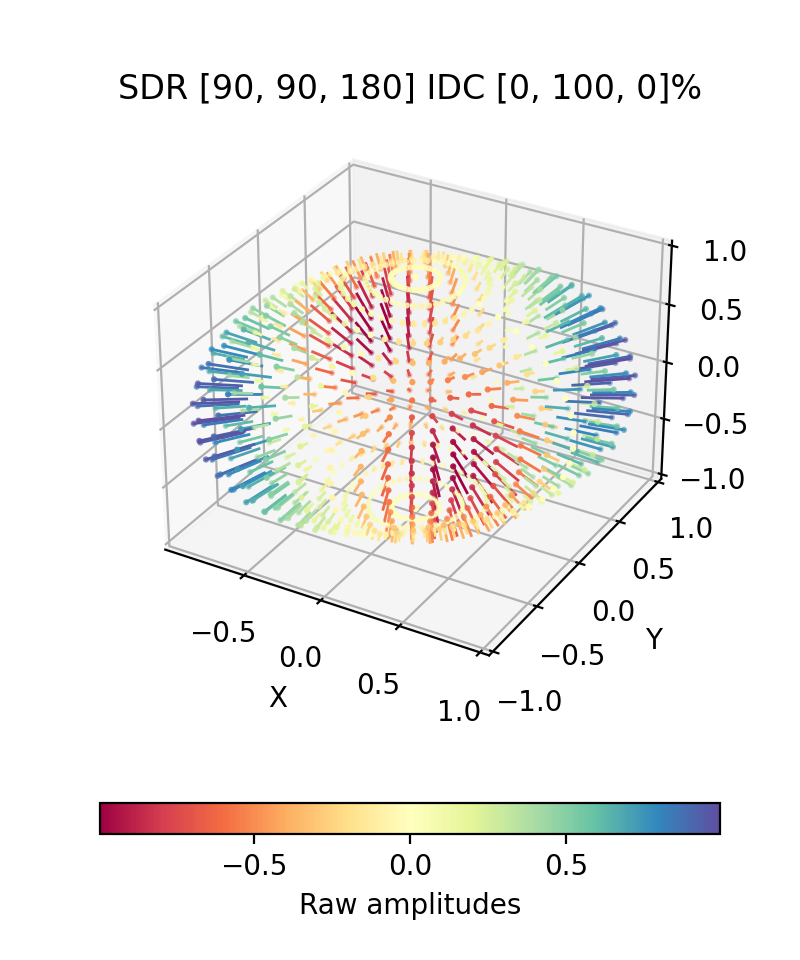

In [7]:
model_example.Vavryeuk.plot(wave='P',style='v')

Other styles of plots can be obtained with option `style`. See `model_example.Aki_Richards.plot?` for details and other options. 

To get a complete, but busy, view of the wavefield, run:

<IPython.core.display.Javascript object>


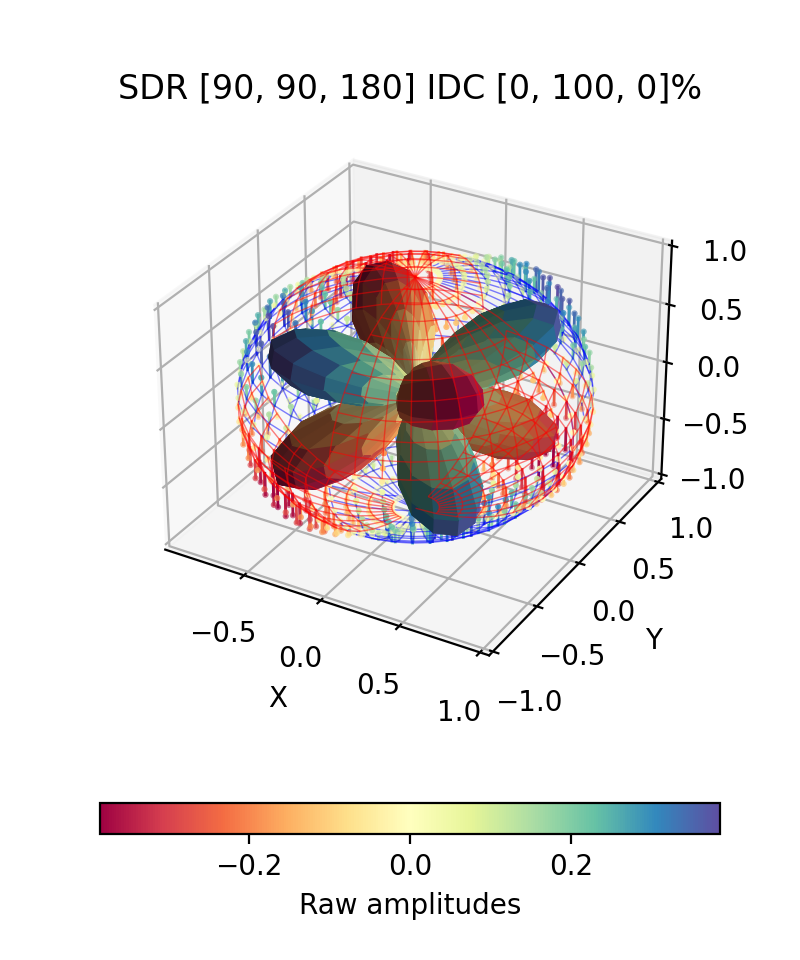

In [8]:
model_example.Aki_Richards.plot(wave='Sv',style='*')

## Various source mechanisms
Moment tensors and radiation patterns can be compared side by side. Considere the following definitions of the principal moment tensors:

In [9]:
# Scale the moment tensors to 1
c=2

# A linear vector
lv = np.array([0,c/2,0,0.,0.,0.])  

# An isotropic source
iso = np.array([c/2,c/2,c/2,0.,0.,0.]) * 1./np.sqrt(3.) 

# A deviatoric source: pure double couple
dc = np.array([0.,0.,0.,np.sqrt(c),0.,0.]) * 1./np.sqrt(2.) 

# A deviatoric source: pure compensated linear vector dipole
clvd = np.array([-c,c/2,c/2,0.,0.,0.]) * 1./np.sqrt(6.) 

Tensile source are a mix of CLVD and isotropic sources. The models available for a shear-tensile cracks can be visually compared with:

<IPython.core.display.Javascript object>


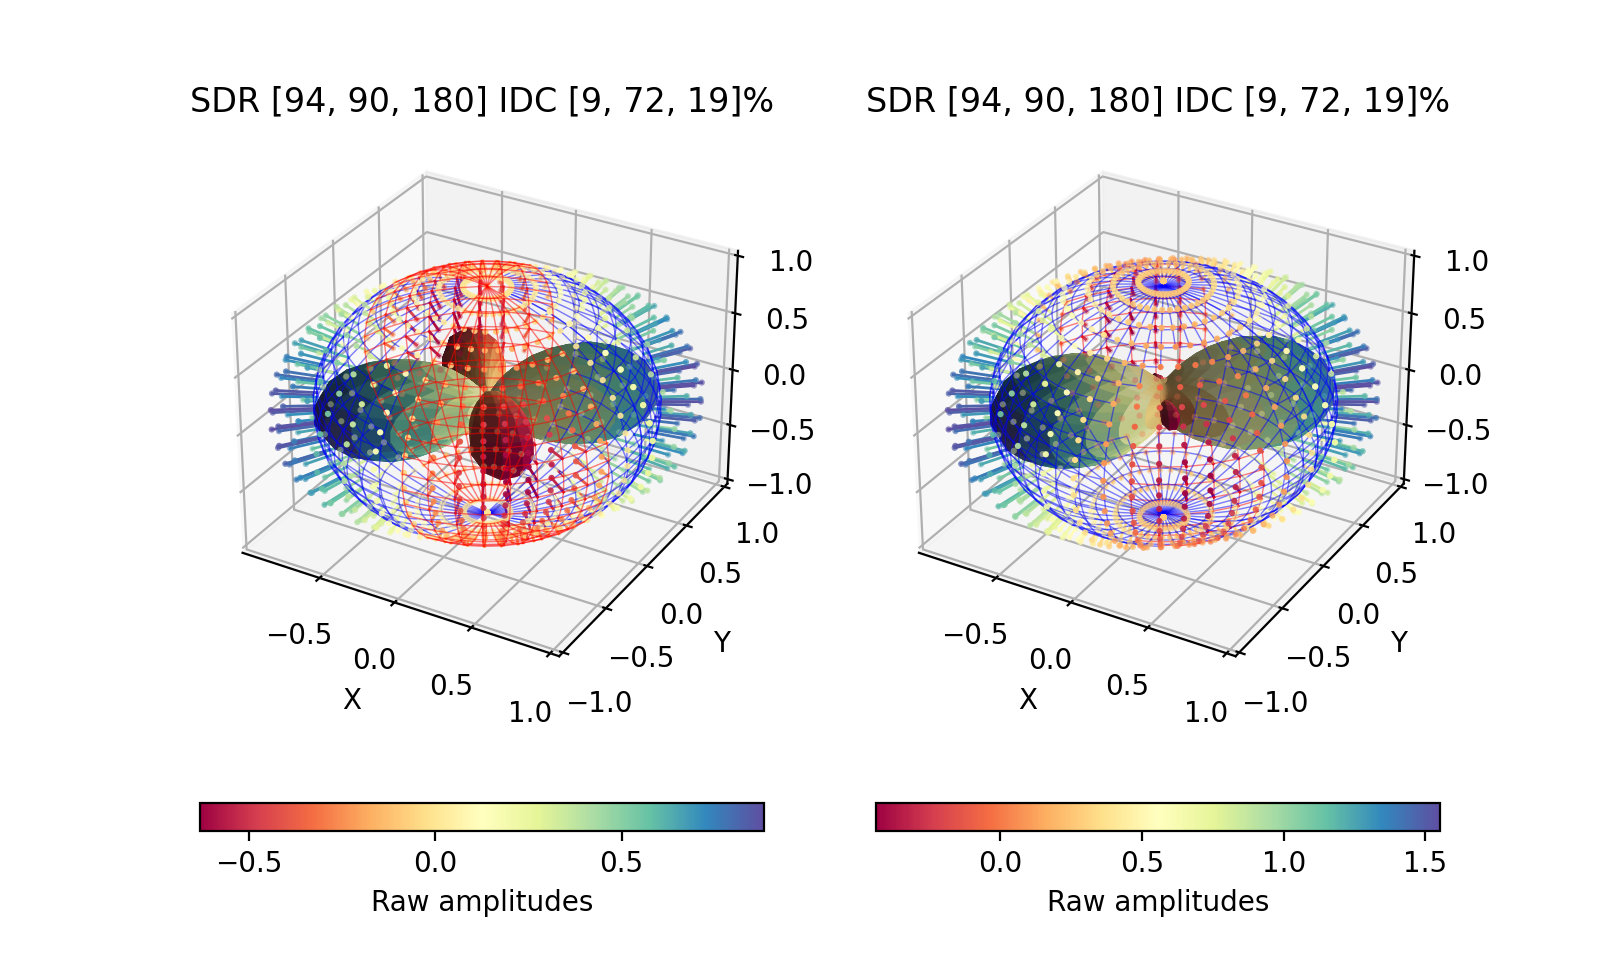

In [10]:
TensileCrack = SeismicSource( dc*3/4 + lv*1/4 )

fig = plt.figure(figsize=plt.figaspect(0.6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')    
TensileCrack.Aki_Richards.plot(wave='P', style='*', ax=ax1)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
TensileCrack.Vavryeuk.plot(wave='P', style='*', ax=ax2)

Download this notebook and choose your own source to explore both models using this example, you will be surprised.
## Quantitative analysis
An instance of `SeismicSource` is composed of one class for each available source model (namely `Aki_Richards` and `Vavryeuk`). The radiation patterns can be compared quantitatively using the `energy` method built in each class (or source model). 

Here is a quick investigation of the evolution of the S/P energy ratio with tensile component increase : 

<IPython.core.display.Javascript object>


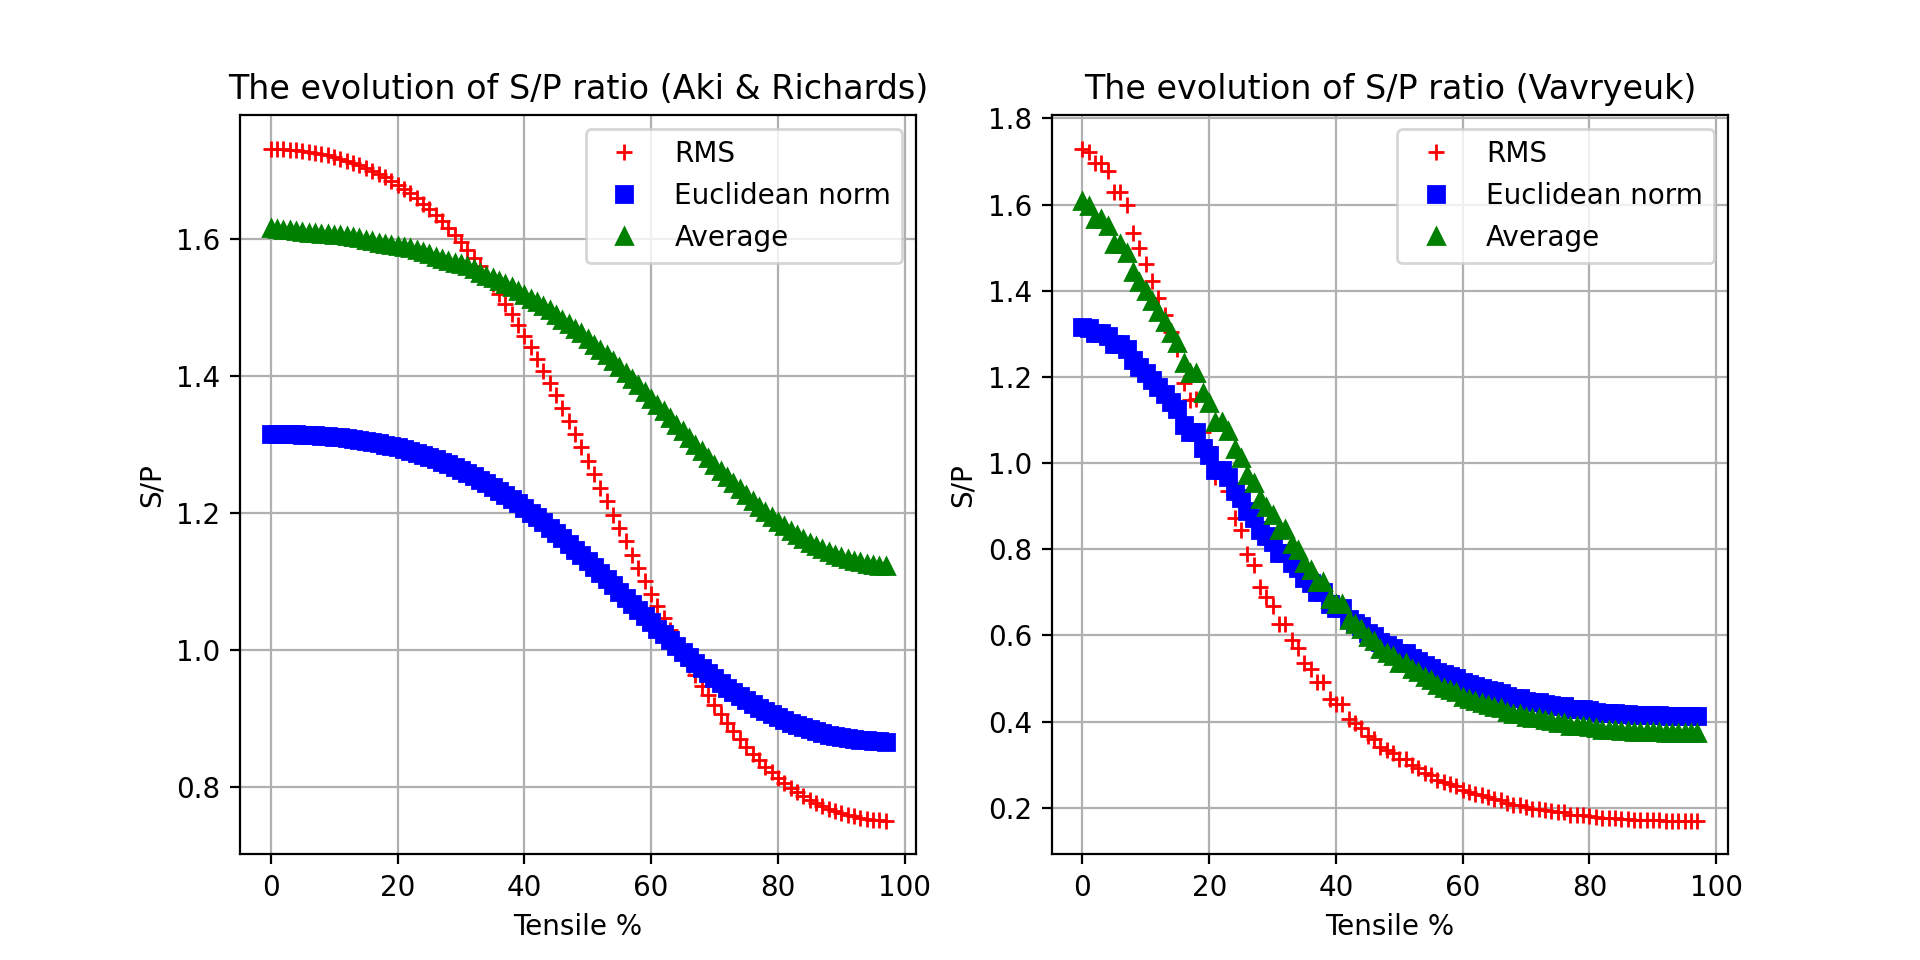

In [11]:
# Initiate stats 
rms=[]
norm=[]
average=[]
## Vavryeuk stats
rms_v=[]
norm_v=[]
average_v=[]

# Increasing the tensile percentage, decreasing double couple 
for x in range(1, 99):    
    example = SeismicSource(dc*(100-x)/100 + lv*x/100)
    
    S = example.Aki_Richards.energy('S')
    P = example.Aki_Richards.energy('P')
    
    S_v = example.Vavryeuk.energy('S')
    P_v = example.Vavryeuk.energy('P')
    
    rms.append(S[0]/P[0])
    norm.append(S[1]/P[1])
    average.append(S[2]/P[2])  
    
    rms_v.append(S_v[0]/P_v[0])
    norm_v.append(S_v[1]/P_v[1])
    average_v.append(S_v[2]/P_v[2]) 

# Plotting the results 
fig = plt.figure(figsize=plt.figaspect(0.5))
plot = fig.add_subplot(1, 2, 1)    
plt.plot(np.arange(98),rms, 'r+', np.arange(98),norm, 'bs', np.arange(98),average, 'g^')
plt.xlabel('Tensile %')
plt.ylabel('S/P')
plt.title('The evolution of S/P ratio (Aki & Richards)')
plt.grid(True)
plt.legend( ["RMS", "Euclidean norm", "Average" ] )
plot = fig.add_subplot(1, 2, 2)
plt.plot(np.arange(98),rms_v, 'r+', np.arange(98),norm_v, 'bs', np.arange(98),average_v, 'g^')
plt.xlabel('Tensile %')
plt.ylabel('S/P')
plt.title('The evolution of S/P ratio (Vavryeuk)')
plt.grid(True)
plt.legend( ["RMS", "Euclidean norm", "Average" ] )
plt.show()

Both models do not show the same sensitivity to the tensile percentage of the seismic source.